In [28]:
#Multiple linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df= pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [31]:
x = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=100
)

In [33]:
#Implementing linear model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
#MODEL Equation
print("Intercept: ",mlr.intercept_)
print("coefficients:")
list(zip(x,mlr.coef_))

Intercept:  2.817275135294997
coefficients:


[('TV', np.float64(0.045586396923019176)),
 ('Radio', np.float64(0.18569815745973386)),
 ('Newspaper', np.float64(0.0022328102410188455))]

**PREDICTION ON THE TEST SET**

In [35]:
y_pred_mlr = mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [10.50948755 20.05723558 16.82665516 19.09405782 20.94383845 13.25348896
 11.87554518 12.4882643  20.51420388 20.91328754 10.90182094 19.44307823
  6.5040246  15.3178433   9.04147699  8.03952046 16.26581002 12.10312044
 17.12086602 11.28131376 17.07036157  9.84452136 20.70077487 17.17479561
 15.19498306 21.96631309 19.1587532  10.09216975 19.40214482 14.88180369
 14.27844074  7.69173892 10.00183154 14.82404891  7.29177732 13.63453936
  7.59380446 11.84106127 13.61631336 15.18810875]


In [36]:
#Actual value and predicted value
mlr_diff = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_mlr})
mlr_diff.head()

,Actual Value,Predicted Value
126,6.6,10.509488
104,20.7,20.057236
99,17.2,16.826655
92,19.4,19.094058
111,21.8,20.943838


### RMSE AND MSE

In [37]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred_mlr)
rmse = np.sqrt(mse)
print("Mean squared error:",mse)
print("Root mean squared error:",rmse)

Mean squared error: 1.7332927815807735
Root mean squared error: 1.316545776485107


### Absolute error and R2 score

In [38]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_mlr)
print("R2 score:",r2)


R2 score: 0.9184369032278497


### Mean absolute error

In [39]:
from sklearn.metrics import mean_absolute_error
mse = mean_absolute_error(y_test,y_pred_mlr)
print("Mean squared error:",mse)

Mean squared error: 1.0271679904924946


### Deviation

In [40]:
df.loc[y_test.index, 'dev'] = y_test - y_pred_mlr
df



,Unnamed: 0,TV,Radio,Newspaper,Sales,dev
0,1,230.1,37.8,69.2,22.1,NaN
1,2,44.5,39.3,45.1,10.4,NaN
2,3,17.2,45.9,69.3,9.3,NaN
3,4,151.5,41.3,58.5,18.5,NaN
4,5,180.8,10.8,58.4,12.9,NaN
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,NaN
196,197,94.2,4.9,8.1,9.7,1.66048
197,198,177.0,9.3,6.4,12.8,NaN
198,199,283.6,42.0,66.2,25.5,NaN


### Training and Test Score

In [41]:
print("Training set score:{:.4f}".format(mlr.score(x_train,y_train)))
print("Testing set score:{:.4f}".format(mlr.score(x_test,y_test)))

Training set score:0.8915
Testing set score:0.9184


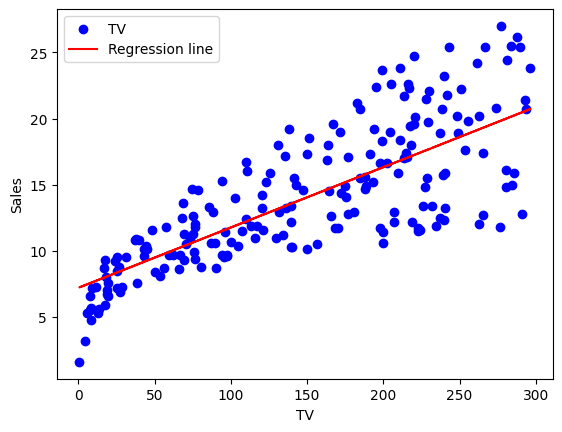

In [42]:
plt.scatter(df['TV'],y, color = 'blue',label= 'TV')
plt.plot(df['TV'],mlr.intercept_ + mlr.coef_[0]*df['TV']+
         mlr.coef_[1]*df['Radio'].mean()+mlr.coef_[2]*df['Newspaper'].mean(),color = 'red',
         label= 'Regression line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()
